In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "datasets/data2.csv"
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       52584 non-null  int64  
 1   MO         52584 non-null  int64  
 2   DY         52584 non-null  int64  
 3   HR         52584 non-null  int64  
 4   ALLSKY_KT  52584 non-null  float64
 5   T2M        52584 non-null  float64
 6   QV2M       52584 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.8 MB


In [4]:
dfcpy = df.copy()

In [5]:
dfcpy.describe()

,YEAR,MO,DY,HR,ALLSKY_KT,T2M,QV2M
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,2020.500342,6.523962,15.726609,11.500000,-489.675083,25.501665,11.661901
std,1.707652,3.448452,8.798896,6.922252,499.658076,6.426816,5.161535
min,2018.000000,1.000000,1.000000,0.000000,-999.000000,6.430000,1.100000
25%,2019.000000,4.000000,8.000000,5.750000,-999.000000,21.720000,6.960000
50%,2020.000000,7.000000,16.000000,11.500000,0.150000,25.115000,11.505000
75%,2022.000000,10.000000,23.000000,17.250000,0.510000,29.260000,16.780000
max,2024.000000,12.000000,31.000000,23.000000,0.810000,44.230000,21.610000


In [6]:
dfcpy.drop(columns=['ALLSKY_KT'], inplace=True)

In [7]:
dfcpy


,YEAR,MO,DY,HR,T2M,QV2M
0,2018,1,1,5,12.14,4.46
1,2018,1,1,6,11.93,4.46
2,2018,1,1,7,14.42,4.58
3,2018,1,1,8,17.50,4.27
4,2018,1,1,9,22.68,4.27
...,...,...,...,...,...,...
52579,2024,1,1,0,16.58,10.25
52580,2024,1,1,1,15.96,10.25
52581,2024,1,1,2,15.40,10.25
52582,2024,1,1,3,14.83,10.25


In [8]:
cols=["YEAR","MO","DY"]
dfcpy['DATE'] = dfcpy[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [9]:
	
# dfcpy['DATE']=pd.to_datetime(dfcpy['DATE'])

In [10]:
dfcpy

,YEAR,MO,DY,HR,T2M,QV2M,DATE
0,2018,1,1,5,12.14,4.46,2018-1-1
1,2018,1,1,6,11.93,4.46,2018-1-1
2,2018,1,1,7,14.42,4.58,2018-1-1
3,2018,1,1,8,17.50,4.27,2018-1-1
4,2018,1,1,9,22.68,4.27,2018-1-1
...,...,...,...,...,...,...,...
52579,2024,1,1,0,16.58,10.25,2024-1-1
52580,2024,1,1,1,15.96,10.25,2024-1-1
52581,2024,1,1,2,15.40,10.25,2024-1-1
52582,2024,1,1,3,14.83,10.25,2024-1-1


In [11]:
dfcpy['DATETIME'] = pd.to_datetime(dfcpy['DATE'] + ' ' + dfcpy['HR'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

In [12]:
dfcpy

,YEAR,MO,DY,HR,T2M,QV2M,DATE,DATETIME
0,2018,1,1,5,12.14,4.46,2018-1-1,2018-01-01 05:00:00
1,2018,1,1,6,11.93,4.46,2018-1-1,2018-01-01 06:00:00
2,2018,1,1,7,14.42,4.58,2018-1-1,2018-01-01 07:00:00
3,2018,1,1,8,17.50,4.27,2018-1-1,2018-01-01 08:00:00
4,2018,1,1,9,22.68,4.27,2018-1-1,2018-01-01 09:00:00
...,...,...,...,...,...,...,...,...
52579,2024,1,1,0,16.58,10.25,2024-1-1,2024-01-01 00:00:00
52580,2024,1,1,1,15.96,10.25,2024-1-1,2024-01-01 01:00:00
52581,2024,1,1,2,15.40,10.25,2024-1-1,2024-01-01 02:00:00
52582,2024,1,1,3,14.83,10.25,2024-1-1,2024-01-01 03:00:00


In [13]:
dfcpy.drop(columns=['YEAR', 'DY', 'MO', 'HR'], inplace=True)

In [14]:
dfcpy.drop(columns=['DATE'], inplace=True)

In [15]:
dfcpy

,T2M,QV2M,DATETIME
0,12.14,4.46,2018-01-01 05:00:00
1,11.93,4.46,2018-01-01 06:00:00
2,14.42,4.58,2018-01-01 07:00:00
3,17.50,4.27,2018-01-01 08:00:00
4,22.68,4.27,2018-01-01 09:00:00
...,...,...,...
52579,16.58,10.25,2024-01-01 00:00:00
52580,15.96,10.25,2024-01-01 01:00:00
52581,15.40,10.25,2024-01-01 02:00:00
52582,14.83,10.25,2024-01-01 03:00:00


In [16]:
dfcpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   T2M       52584 non-null  float64       
 1   QV2M      52584 non-null  float64       
 2   DATETIME  52584 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.2 MB


In [17]:
dfcpy.describe()

,T2M,QV2M,DATETIME
count,52584.000000,52584.000000,52584
mean,25.501665,11.661901,2020-12-31 16:30:00
min,6.430000,1.100000,2018-01-01 05:00:00
25%,21.720000,6.960000,2019-07-02 22:45:00
50%,25.115000,11.505000,2020-12-31 16:30:00
75%,29.260000,16.780000,2022-07-02 10:15:00
max,44.230000,21.610000,2024-01-01 04:00:00
std,6.426816,5.161535,NaN


<Axes: >

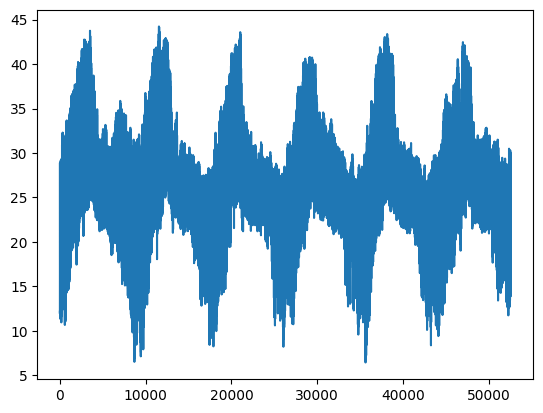

In [18]:
temp = dfcpy['T2M']
dfcpy['T2M'].plot()

In [19]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [20]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((52579, 5, 1), (52579,))

In [21]:
X_train1, y_train1 = X1[:50000], y1[:50000]
X_val1, y_val1 = X1[50000:51000], y1[50000:51000]
X_test1, y_test1 = X1[51000:], y1[51000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((50000, 5, 1), (50000,), (1000, 5, 1), (1000,), (1579, 5, 1), (1579,))

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [24]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()
cp1 = ModelCheckpoint('model1/', save_best_only=True)
# this was temp haryana!!!!
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10

1554/1563 [============================>.] - ETA: 0s - loss: 364.8758 - root_mean_squared_error: 19.1017INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 11s 5ms/step - loss: 363.3759 - root_mean_squared_error: 19.0624 - val_loss: 51.4460 - val_root_mean_squared_error: 7.1726
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 42.2277 - root_mean_squared_error: 6.4983INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 42.2277 - root_mean_squared_error: 6.4983 - val_loss: 2.6851 - val_root_mean_squared_error: 1.6386
Epoch 3/10
1554/1563 [============================>.] - ETA: 0s - loss: 7.1056 - root_mean_squared_error: 2.6656INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 7.0851 - root_mean_squared_error: 2.6618 - val_loss: 0.4374 - val_root_mean_squared_error: 0.6614
Epoch 4/10
1550/1563 [============================>.] - ETA: 0s - loss: 1.7695 - root_mean_squared_error: 1.3302INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 1.7634 - root_mean_squared_error: 1.3279 - val_loss: 0.2922 - val_root_mean_squared_error: 0.5405
Epoch 5/10
1555/1563 [============================>.] - ETA: 0s - loss: 0.7806 - root_mean_squared_error: 0.8835INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.7804 - root_mean_squared_error: 0.8834 - val_loss: 0.2556 - val_root_mean_squared_error: 0.5056
Epoch 6/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.5199 - root_mean_squared_error: 0.7210INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.5197 - root_mean_squared_error: 0.7209 - val_loss: 0.2489 - val_root_mean_squared_error: 0.4989
Epoch 7/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.4163 - root_mean_squared_error: 0.6452INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.4160 - root_mean_squared_error: 0.6450 - val_loss: 0.2026 - val_root_mean_squared_error: 0.4501
Epoch 8/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.3674 - root_mean_squared_error: 0.6062INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.3675 - root_mean_squared_error: 0.6062 - val_loss: 0.1874 - val_root_mean_squared_error: 0.4329
Epoch 9/10
1550/1563 [============================>.] - ETA: 0s - loss: 0.3440 - root_mean_squared_error: 0.5865INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.3443 - root_mean_squared_error: 0.5867 - val_loss: 0.1839 - val_root_mean_squared_error: 0.4288
Epoch 10/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.3298 - root_mean_squared_error: 0.5743INFO:tensorflow:Assets written to: temp_haryana\assets


INFO:tensorflow:Assets written to: temp_haryana\assets


1563/1563 [==============================] - 8s 5ms/step - loss: 0.3299 - root_mean_squared_error: 0.5743 - val_loss: 0.1785 - val_root_mean_squared_error: 0.4225


In [36]:
from tensorflow.keras.models import load_model
model1 = load_model('temp_haryana/')

In [37]:
train_predictions = model1.predict(X_test1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test1})
train_results

50/50 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,30.561872,29.08
1,29.452477,30.12
2,30.528217,30.80
3,30.839727,31.02
4,30.596153,30.79
...,...,...
1574,16.710960,16.58
1575,16.171999,15.96
1576,15.625384,15.40
1577,15.163112,14.83


In [38]:
X_train1

array([[[12.14],
        [11.93],
        [14.42],
        [17.5 ],
        [22.68]],

       [[11.93],
        [14.42],
        [17.5 ],
        [22.68],
        [26.12]],

       [[14.42],
        [17.5 ],
        [22.68],
        [26.12],
        [27.52]],

       ...,

       [[27.37],
        [27.98],
        [28.23],
        [28.08],
        [27.45]],

       [[27.98],
        [28.23],
        [28.08],
        [27.45],
        [26.63]],

       [[28.23],
        [28.08],
        [27.45],
        [26.63],
        [25.67]]])

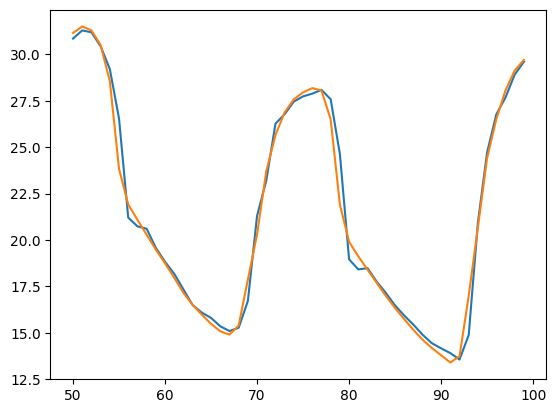

In [39]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [40]:
def plot_predictions(model, X, y, start=0, end=100):
    pred = model.predict(X).flatten()
    df = pd.DataFrame(data={'predictions': pred, 'actuals': y})
    plt.plot(df['predictions'][start:end], label='predicted')
    plt.plot(df['actuals'][start:end], label='actual')
    plt.legend()
    return df

50/50 [==============================] - 0s 2ms/step


,predictions,actuals
0,30.561872,29.08
1,29.452477,30.12
2,30.528217,30.80
3,30.839727,31.02
4,30.596153,30.79
...,...,...
1574,16.710960,16.58
1575,16.171999,15.96
1576,15.625384,15.40
1577,15.163112,14.83


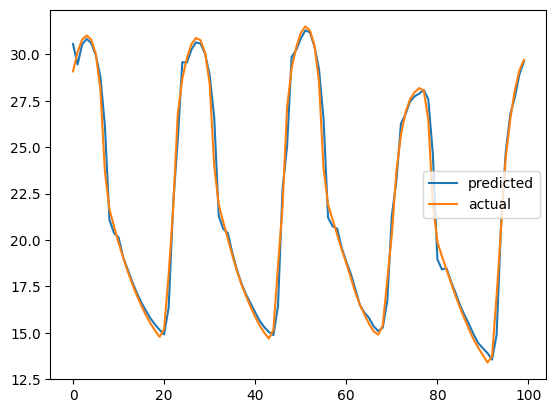

In [41]:
plot_predictions(model1, X_test1, y_test1)

In [42]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [409]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10


1560/1563 [============================>.] - ETA: 0s - loss: 4.6216 - root_mean_squared_error: 2.1498INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1563/1563 [==============================] - 4s 2ms/step - loss: 4.6180 - root_mean_squared_error: 2.1490 - val_loss: 1.2458 - val_root_mean_squared_error: 1.1162
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 1.2474 - root_mean_squared_error: 1.1169INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1563/1563 [==============================] - 3s 2ms/step - loss: 1.2474 - root_mean_squared_error: 1.1169 - val_loss: 0.6524 - val_root_mean_squared_error: 0.8077
Epoch 3/10
1544/1563 [============================>.] - ETA: 0s - loss: 0.7652 - root_mean_squared_error: 0.8748INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1563/1563 [==============================] - 3s 2ms/step - loss: 0.7648 - root_mean_squared_error: 0.8745 - val_loss: 0.4023 - val_root_mean_squared_error: 0.6343
Epoch 4/10
1551/1563 [============================>.] - ETA: 0s - loss: 0.6388 - root_mean_squared_error: 0.7993INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1563/1563 [==============================] - 3s 2ms/step - loss: 0.6382 - root_mean_squared_error: 0.7989 - val_loss: 0.3492 - val_root_mean_squared_error: 0.5909
Epoch 5/10
1557/1563 [============================>.] - ETA: 0s - loss: 0.5640 - root_mean_squared_error: 0.7510INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1563/1563 [==============================] - 3s 2ms/step - loss: 0.5630 - root_mean_squared_error: 0.7503 - val_loss: 0.3078 - val_root_mean_squared_error: 0.5548
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5094 - root_mean_squared_error: 0.7137 - val_loss: 0.3133 - val_root_mean_squared_error: 0.5597
Epoch 7/10
1544/1563 [============================>.] - ETA: 0s - loss: 0.4764 - root_mean_squared_error: 0.6902INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1563/1563 [==============================] - 3s 2ms/step - loss: 0.4763 - root_mean_squared_error: 0.6901 - val_loss: 0.2586 - val_root_mean_squared_error: 0.5085
Epoch 8/10
1547/1563 [============================>.] - ETA: 0s - loss: 0.4565 - root_mean_squared_error: 0.6757INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1563/1563 [==============================] - 81s 52ms/step - loss: 0.4566 - root_mean_squared_error: 0.6758 - val_loss: 0.2510 - val_root_mean_squared_error: 0.5010
Epoch 9/10
1529/1563 [============================>.] - ETA: 0s - loss: 0.4468 - root_mean_squared_error: 0.6684INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1563/1563 [==============================] - 3s 2ms/step - loss: 0.4461 - root_mean_squared_error: 0.6679 - val_loss: 0.2448 - val_root_mean_squared_error: 0.4948
Epoch 10/10
1555/1563 [============================>.] - ETA: 0s - loss: 0.4385 - root_mean_squared_error: 0.6622INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1563/1563 [==============================] - 2s 2ms/step - loss: 0.4382 - root_mean_squared_error: 0.6620 - val_loss: 0.2359 - val_root_mean_squared_error: 0.4857


50/50 [==============================] - 0s 872us/step


,predictions,actuals
0,31.204617,29.08
1,29.947952,30.12
2,30.287439,30.80
3,31.223747,31.02
4,30.859665,30.79
...,...,...
1574,16.861675,16.58
1575,16.297150,15.96
1576,15.725129,15.40
1577,15.239339,14.83


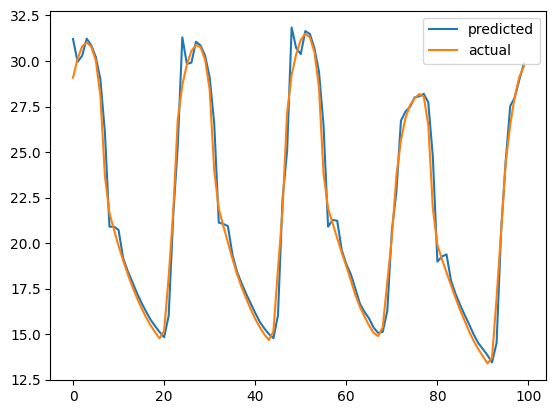

In [410]:
plot_predictions(model2, X_test1, y_test1)

In [49]:
df

,YEAR,MO,DY,HR,ALLSKY_KT,T2M,QV2M
0,2018,1,1,5,-999.00,12.14,4.46
1,2018,1,1,6,0.37,11.93,4.46
2,2018,1,1,7,0.50,14.42,4.58
3,2018,1,1,8,0.63,17.50,4.27
4,2018,1,1,9,0.70,22.68,4.27
...,...,...,...,...,...,...,...
52579,2024,1,1,0,-999.00,16.58,10.25
52580,2024,1,1,1,-999.00,15.96,10.25
52581,2024,1,1,2,-999.00,15.40,10.25
52582,2024,1,1,3,-999.00,14.83,10.25


In [50]:
dfcpy

,T2M,QV2M,DATETIME
0,12.14,4.46,2018-01-01 05:00:00
1,11.93,4.46,2018-01-01 06:00:00
2,14.42,4.58,2018-01-01 07:00:00
3,17.50,4.27,2018-01-01 08:00:00
4,22.68,4.27,2018-01-01 09:00:00
...,...,...,...
52579,16.58,10.25,2024-01-01 00:00:00
52580,15.96,10.25,2024-01-01 01:00:00
52581,15.40,10.25,2024-01-01 02:00:00
52582,14.83,10.25,2024-01-01 03:00:00


In [51]:
temp_df = pd.DataFrame({'TEMP': temp})
temp_df['DAY'] = df['DY']
temp_df['HOUR'] = df['HR']
temp_df['MONTH'] = df['MO']

In [52]:
temp_df

,TEMP,DAY,HOUR,MONTH
0,12.14,1,5,1
1,11.93,1,6,1
2,14.42,1,7,1
3,17.50,1,8,1
4,22.68,1,9,1
...,...,...,...,...
52579,16.58,1,0,1
52580,15.96,1,1,1
52581,15.40,1,2,1
52582,14.83,1,3,1


In [53]:
# temp_df['TIMEVAL'] = temp_df['HOUR']+temp_df['DAY']*24+temp_df['MONTH']*30*24

In [54]:
temp_df

,TEMP,DAY,HOUR,MONTH
0,12.14,1,5,1
1,11.93,1,6,1
2,14.42,1,7,1
3,17.50,1,8,1
4,22.68,1,9,1
...,...,...,...,...
52579,16.58,1,0,1
52580,15.96,1,1,1
52581,15.40,1,2,1
52582,14.83,1,3,1


In [55]:
# temp_df.drop(columns=['TIMEVAL'], inplace=True)

In [56]:
temp_df

,TEMP,DAY,HOUR,MONTH
0,12.14,1,5,1
1,11.93,1,6,1
2,14.42,1,7,1
3,17.50,1,8,1
4,22.68,1,9,1
...,...,...,...,...
52579,16.58,1,0,1
52580,15.96,1,1,1
52581,15.40,1,2,1
52582,14.83,1,3,1


In [57]:
def df_to_XY(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [58]:
X2, y2 = df_to_XY(temp_df)
X2.shape, y2.shape

((52579, 5, 4), (52579,))

In [59]:
X_train2, y_train2 = X2[:50000], y2[:50000]
X_val2, y_val2 = X2[50000:51000], y2[50000:51000]
X_test2, y_test2 = X2[51000:], y2[51000:]

In [60]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [61]:
X_train2

array([[[12.14,  1.  ,  5.  ,  1.  ],
        [11.93,  1.  ,  6.  ,  1.  ],
        [14.42,  1.  ,  7.  ,  1.  ],
        [17.5 ,  1.  ,  8.  ,  1.  ],
        [22.68,  1.  ,  9.  ,  1.  ]],

       [[11.93,  1.  ,  6.  ,  1.  ],
        [14.42,  1.  ,  7.  ,  1.  ],
        [17.5 ,  1.  ,  8.  ,  1.  ],
        [22.68,  1.  ,  9.  ,  1.  ],
        [26.12,  1.  , 10.  ,  1.  ]],

       [[14.42,  1.  ,  7.  ,  1.  ],
        [17.5 ,  1.  ,  8.  ,  1.  ],
        [22.68,  1.  ,  9.  ,  1.  ],
        [26.12,  1.  , 10.  ,  1.  ],
        [27.52,  1.  , 11.  ,  1.  ]],

       ...,

       [[27.37, 15.  , 10.  ,  9.  ],
        [27.98, 15.  , 11.  ,  9.  ],
        [28.23, 15.  , 12.  ,  9.  ],
        [28.08, 15.  , 13.  ,  9.  ],
        [27.45, 15.  , 14.  ,  9.  ]],

       [[27.98, 15.  , 11.  ,  9.  ],
        [28.23, 15.  , 12.  ,  9.  ],
        [28.08, 15.  , 13.  ,  9.  ],
        [27.45, 15.  , 14.  ,  9.  ],
        [26.63, 15.  , 15.  ,  9.  ]],

       [[28.23, 15.  , 12. 

In [62]:
# X_train2[:, :, 0] = scaler.fit_transform(X_train2[:, :, 0])

In [63]:
X_train2

array([[[12.14,  1.  ,  5.  ,  1.  ],
        [11.93,  1.  ,  6.  ,  1.  ],
        [14.42,  1.  ,  7.  ,  1.  ],
        [17.5 ,  1.  ,  8.  ,  1.  ],
        [22.68,  1.  ,  9.  ,  1.  ]],

       [[11.93,  1.  ,  6.  ,  1.  ],
        [14.42,  1.  ,  7.  ,  1.  ],
        [17.5 ,  1.  ,  8.  ,  1.  ],
        [22.68,  1.  ,  9.  ,  1.  ],
        [26.12,  1.  , 10.  ,  1.  ]],

       [[14.42,  1.  ,  7.  ,  1.  ],
        [17.5 ,  1.  ,  8.  ,  1.  ],
        [22.68,  1.  ,  9.  ,  1.  ],
        [26.12,  1.  , 10.  ,  1.  ],
        [27.52,  1.  , 11.  ,  1.  ]],

       ...,

       [[27.37, 15.  , 10.  ,  9.  ],
        [27.98, 15.  , 11.  ,  9.  ],
        [28.23, 15.  , 12.  ,  9.  ],
        [28.08, 15.  , 13.  ,  9.  ],
        [27.45, 15.  , 14.  ,  9.  ]],

       [[27.98, 15.  , 11.  ,  9.  ],
        [28.23, 15.  , 12.  ,  9.  ],
        [28.08, 15.  , 13.  ,  9.  ],
        [27.45, 15.  , 14.  ,  9.  ],
        [26.63, 15.  , 15.  ,  9.  ]],

       [[28.23, 15.  , 12. 

In [64]:
# X_test2[:, :, 0] = scaler.fit_transform(X_test2[:, :, 0])
# X_val2[:, :, 0] = scaler.fit_transform(X_val2[:, :, 0])

In [65]:
model4 = Sequential()
model4.add(InputLayer((5, 4)))
model4.add(LSTM(64))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='linear'))

model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17664     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18193 (71.07 KB)
Trainable params: 18193 (71.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [457]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [458]:
model4.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=10, callbacks=[cp4])

Epoch 1/10
1558/1563 [============================>.] - ETA: 0s - loss: 205.0119 - root_mean_squared_error: 14.3182INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1563/1563 [==============================] - 8s 4ms/step - loss: 204.4598 - root_mean_squared_error: 14.2989 - val_loss: 4.6401 - val_root_mean_squared_error: 2.1541
Epoch 2/10
1545/1563 [============================>.] - ETA: 0s - loss: 8.1680 - root_mean_squared_error: 2.8580INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1563/1563 [==============================] - 6s 4ms/step - loss: 8.1045 - root_mean_squared_error: 2.8468 - val_loss: 0.6530 - val_root_mean_squared_error: 0.8081
Epoch 3/10
1554/1563 [============================>.] - ETA: 0s - loss: 1.5080 - root_mean_squared_error: 1.2280INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1563/1563 [==============================] - 7s 5ms/step - loss: 1.5029 - root_mean_squared_error: 1.2259 - val_loss: 0.3275 - val_root_mean_squared_error: 0.5723
Epoch 4/10
1547/1563 [============================>.] - ETA: 0s - loss: 0.5222 - root_mean_squared_error: 0.7227INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1563/1563 [==============================] - 6s 4ms/step - loss: 0.5210 - root_mean_squared_error: 0.7218 - val_loss: 0.2467 - val_root_mean_squared_error: 0.4967
Epoch 5/10
1563/1563 [==============================] - ETA: 0s - loss: 0.3326 - root_mean_squared_error: 0.5767INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1563/1563 [==============================] - 6s 4ms/step - loss: 0.3326 - root_mean_squared_error: 0.5767 - val_loss: 0.1726 - val_root_mean_squared_error: 0.4155
Epoch 6/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.2707 - root_mean_squared_error: 0.5203INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1563/1563 [==============================] - 6s 4ms/step - loss: 0.2708 - root_mean_squared_error: 0.5204 - val_loss: 0.1472 - val_root_mean_squared_error: 0.3837
Epoch 7/10
1546/1563 [============================>.] - ETA: 0s - loss: 0.2356 - root_mean_squared_error: 0.4854INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1563/1563 [==============================] - 6s 4ms/step - loss: 0.2366 - root_mean_squared_error: 0.4864 - val_loss: 0.1465 - val_root_mean_squared_error: 0.3828
Epoch 8/10
1556/1563 [============================>.] - ETA: 0s - loss: 0.2117 - root_mean_squared_error: 0.4601INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1563/1563 [==============================] - 5s 3ms/step - loss: 0.2114 - root_mean_squared_error: 0.4598 - val_loss: 0.1172 - val_root_mean_squared_error: 0.3424
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1943 - root_mean_squared_error: 0.4408 - val_loss: 0.1204 - val_root_mean_squared_error: 0.3470
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1824 - root_mean_squared_error: 0.4271 - val_loss: 0.1188 - val_root_mean_squared_error: 0.3447


50/50 [==============================] - 0s 980us/step


,predictions,actuals
0,29.601713,29.08
1,29.863361,30.12
2,30.676607,30.80
3,30.961699,31.02
4,30.759722,30.79
...,...,...
1574,16.560860,16.58
1575,17.662519,15.96
1576,16.110882,15.40
1577,15.358893,14.83


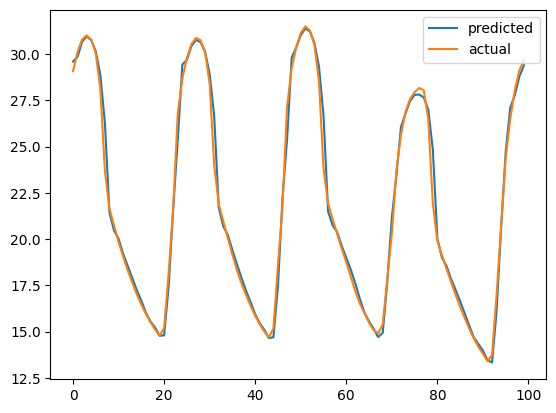

In [459]:
plot_predictions(model4, X_test2, y_test2)

In [66]:
X_train2

array([[[12.14,  1.  ,  5.  ,  1.  ],
        [11.93,  1.  ,  6.  ,  1.  ],
        [14.42,  1.  ,  7.  ,  1.  ],
        [17.5 ,  1.  ,  8.  ,  1.  ],
        [22.68,  1.  ,  9.  ,  1.  ]],

       [[11.93,  1.  ,  6.  ,  1.  ],
        [14.42,  1.  ,  7.  ,  1.  ],
        [17.5 ,  1.  ,  8.  ,  1.  ],
        [22.68,  1.  ,  9.  ,  1.  ],
        [26.12,  1.  , 10.  ,  1.  ]],

       [[14.42,  1.  ,  7.  ,  1.  ],
        [17.5 ,  1.  ,  8.  ,  1.  ],
        [22.68,  1.  ,  9.  ,  1.  ],
        [26.12,  1.  , 10.  ,  1.  ],
        [27.52,  1.  , 11.  ,  1.  ]],

       ...,

       [[27.37, 15.  , 10.  ,  9.  ],
        [27.98, 15.  , 11.  ,  9.  ],
        [28.23, 15.  , 12.  ,  9.  ],
        [28.08, 15.  , 13.  ,  9.  ],
        [27.45, 15.  , 14.  ,  9.  ]],

       [[27.98, 15.  , 11.  ,  9.  ],
        [28.23, 15.  , 12.  ,  9.  ],
        [28.08, 15.  , 13.  ,  9.  ],
        [27.45, 15.  , 14.  ,  9.  ],
        [26.63, 15.  , 15.  ,  9.  ]],

       [[28.23, 15.  , 12. 

In [67]:
model4.predict([[
        [27.37, 15.  , 10.  ,  9.  ],
        [27.98, 15.  , 11.  ,  9.  ],
        [28.23, 15.  , 12.  ,  9.  ],
        [28.08, 15.  , 13.  ,  9.  ],
        [27.45, 15.  , 14.  ,  9.  ]]])
# needs 5 previous rows for prediction!

1/1 [==============================] - 0s 480ms/step


array([[0.71955246]], dtype=float32)

In [68]:
df

,YEAR,MO,DY,HR,ALLSKY_KT,T2M,QV2M
0,2018,1,1,5,-999.00,12.14,4.46
1,2018,1,1,6,0.37,11.93,4.46
2,2018,1,1,7,0.50,14.42,4.58
3,2018,1,1,8,0.63,17.50,4.27
4,2018,1,1,9,0.70,22.68,4.27
...,...,...,...,...,...,...,...
52579,2024,1,1,0,-999.00,16.58,10.25
52580,2024,1,1,1,-999.00,15.96,10.25
52581,2024,1,1,2,-999.00,15.40,10.25
52582,2024,1,1,3,-999.00,14.83,10.25


In [69]:
itr1 = temp_df.iloc[-5:].values
itr1 = itr1.tolist()
# will be used for predictions!
# 2024 jan

In [70]:
itr2 = temp_df.iloc[-(366*24-19):-366*24+24].values
itr2 = itr2.tolist()
# 2023 jan

In [97]:
itr1

[[16.58, 1.0, 0.0, 1.0],
 [15.96, 1.0, 1.0, 1.0],
 [15.4, 1.0, 2.0, 1.0],
 [14.83, 1.0, 3.0, 1.0],
 [14.34, 1.0, 4.0, 1.0]]

In [98]:
itr2

[[14.62, 1.0, 0.0, 1.0],
 [14.44, 1.0, 1.0, 1.0],
 [14.05, 1.0, 2.0, 1.0],
 [13.51, 1.0, 3.0, 1.0],
 [12.94, 1.0, 4.0, 1.0]]

In [99]:
# model4.predict(
#     [itr]
# )

In [100]:
import sqlite3

In [101]:
con = sqlite3.connect('haryana_temperatures.db')
cur = con.cursor()

In [102]:
cur.execute(
    """
    CREATE TABLE IF NOT EXISTS haryanafinal(
        day INT,
        month INT,
        year INT,
        hour INT,
        temp REAL
    )
    """
)

In [ ]:
# cur.execute("""DELETE TABLE haryana_tem""")

In [95]:
def plot_day(day, month):
    temperatures = []
    window = itr1.copy()
    hour = 5
    for i in range(5):
        temperatures.append(window[i][0])
        
    while (hour!=24):
        pred = model4.predict(np.expand_dims(window, axis=0))[0][0]
        temperatures.append(pred)
        window.append([pred, day, hour, month])
        window.pop(0)
        window[-1][1] += 0.0
        window[-1][2] += 0.0
        window[-1][3] += 0.0
        hour += 1
        print(hour, pred)
        print(window)
        cur.execute("""INSERT INTO haryanafinal VALUES (?, ?, ?, ?, ?)""", (day, month, 2024, hour, pred))
        
    plt.plot([i for i in range(24)], temperatures, c='red', label='predicted')
    plt.plot([i for i in range(5)], temperatures[:5], c='blue', label='actual')
    plt.legend()
    plt.title('Weather Prediction for ' + str(day) + ' / ' + str(month) + ' / 2024')
    plt.xlabel('time in hours')
    plt.ylabel('temperature in degree Celsius')
    plt.show()

1/1 [==============================] - 0s 31ms/step
6 0.4792476
[[15.96, 1.0, 1.0, 1.0], [15.4, 1.0, 2.0, 1.0], [14.83, 1.0, 3.0, 1.0], [14.34, 1.0, 4.0, 1.0], [0.4792476, 1.0, 5.0, 1.0]]
1/1 [==============================] - 0s 31ms/step
7 0.21291015
[[15.4, 1.0, 2.0, 1.0], [14.83, 1.0, 3.0, 1.0], [14.34, 1.0, 4.0, 1.0], [0.4792476, 1.0, 5.0, 1.0], [0.21291015, 1.0, 6.0, 1.0]]
1/1 [==============================] - 0s 22ms/step
8 0.06511132
[[14.83, 1.0, 3.0, 1.0], [14.34, 1.0, 4.0, 1.0], [0.4792476, 1.0, 5.0, 1.0], [0.21291015, 1.0, 6.0, 1.0], [0.06511132, 1.0, 7.0, 1.0]]
1/1 [==============================] - 0s 31ms/step
9 -0.07438846
[[14.34, 1.0, 4.0, 1.0], [0.4792476, 1.0, 5.0, 1.0], [0.21291015, 1.0, 6.0, 1.0], [0.06511132, 1.0, 7.0, 1.0], [-0.07438846, 1.0, 8.0, 1.0]]
1/1 [==============================] - 0s 29ms/step
10 -0.13970748
[[0.4792476, 1.0, 5.0, 1.0], [0.21291015, 1.0, 6.0, 1.0], [0.06511132, 1.0, 7.0, 1.0], [-0.07438846, 1.0, 8.0, 1.0], [-0.13970748, 1.0, 9.0, 1.0

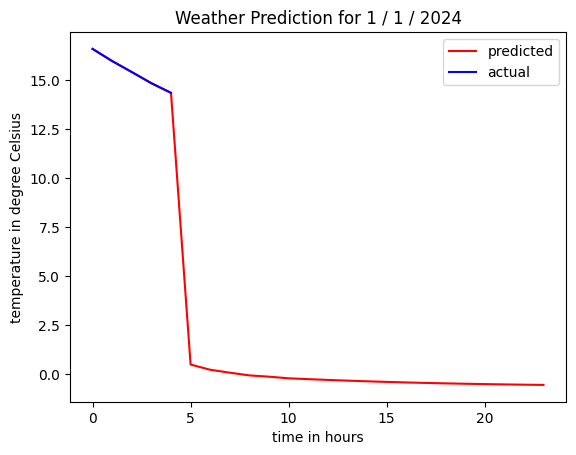

In [96]:
plot_day(1, 1)

In [470]:
def compare(itr1, itr2):
    
    temperatures1 = []
    temperatures2 = []
    window1 = itr1.copy()
    window2 = itr2.copy()
    hour = 5
    for i in range(5):
        temperatures1.append(window1[i][0])
        temperatures2.append(window2[i][0])
        
    while (hour!=24):
        pred1 = model4.predict(np.expand_dims(window1, axis=0))[0][0]
        temperatures1.append(pred1)
        window1.append([pred1, itr1[0][1], hour, itr1[0][3]])
        window1.pop(0)
        window1[-1][1] += 0.0
        window1[-1][2] += 0.0
        window1[-1][3] += 0.0
        
        pred2 = model4.predict(np.expand_dims(window2, axis=0))[0][0]
        temperatures2.append(pred2)
        window2.append([pred2, itr2[0][1], hour, itr2[0][3]])
        window2.pop(0)
        window2[-1][1] += 0.0
        window2[-1][2] += 0.0
        window2[-1][3] += 0.0
        hour += 1
    
    plt.plot([i for i in range(24)], temperatures1, c='black', label='2023')
    plt.plot([i for i in range(24)], temperatures2, c='blue', label='2024')
    plt.legend()
    plt.title('Weather Prediction for ' + str(int(itr1[0][1])) + ' / ' + str(int(itr2[0][3])) + ' in 2023 and in 2024')
    plt.xlabel('time in hours')
    plt.ylabel('temperature in degree Celsius')
    plt.show()

1/1 [==============================] - 0s 11ms/step


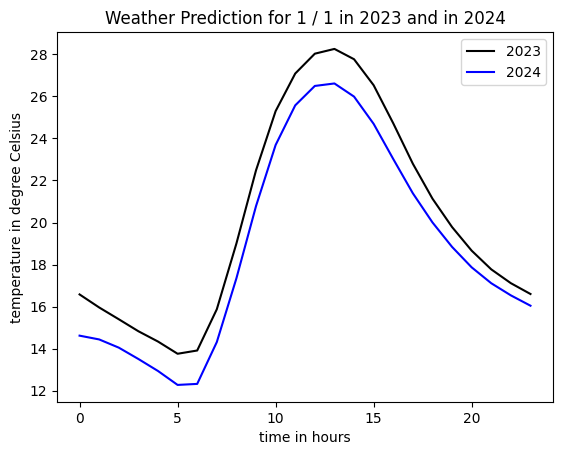

In [471]:
compare(itr1, itr2)